<a href="https://colab.research.google.com/github/mkrajevsky/NLP_guzman/blob/main/Micha%C5%82_Krajewski_05_Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$\textbf{Logistic Regression (2.0)}$
---

$\textbf{Import libraries}$

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

$\textbf{Build a perceptron by subclassing the} \color{green}{\textbf{ Model}} \color{blue}{\textbf{ class}} \textbf{ from} \color{green}{\textbf{ TensorFlow}}$

In [ ]:
class Perceptron(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.layer = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)

    def call(self, inputs):
        return self.layer(inputs)

$\textbf{The logistic regression} \color{blue}{\textbf{ class }} \textbf{(2.0)}$

In [ ]:
class Logistic_Regression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.model = Perceptron() # <- Model definition
        self.loss_acc = None

    # train the model
    def train(self, LR, epochs):
        self.model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=LR),
                           loss=tf.keras.losses.BinaryCrossentropy(),
                           metrics=['accuracy'])
        self.loss_acc = self.model.fit(self.X, self.Y, epochs=epochs, verbose=0)

    # visualization
    def plot_model(self):
        # get weights
        W, B = self.model.layer.weights
        # get slope and interceptor
        m = -W[0][0]/W[1][0]
        b = -B[0]/W[1][0]
        # plot model
        x = np.linspace(min(self.X.T[1]), max(self.X.T[1]), 100)
        y = m*x + b
        plt.plot(x, y, label='model')
        # plot data points
        plt.scatter(self.X[self.Y==1, 0], self.X[self.Y==1, 1], label='passed', c='b')
        plt.scatter(self.X[self.Y==0, 0], self.X[self.Y==0, 1], label='flunked', c='r')
        plt.legend()
        plt.show()

    # plot loss and accuracy history
    def plot_loss_accuracy(self):
        fig = plt.figure(figsize=(8, 4))
        fig.suptitle('Log Loss and Accuracy over epochs')

        # add_subplot(nrows, ncolumns, index)
        ax = fig.add_subplot(1, 2, 1)
        ax.plot(self.loss_acc.history['loss'])
        ax.grid(True)
        ax.set(xlabel='Epochs', title='Log Loss')

        ax = fig.add_subplot(1, 2, 2)
        ax.plot(self.loss_acc.history['accuracy'])
        ax.grid(True)
        ax.set(xlabel='Epochs', title='Accuracy')

#$\color{red} {\textbf{Dataset}}$

$\textbf{Mount the drive and change the directory}$

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive/')

# change directory
%cd 'drive/MyDrive/Classroom/Introduction to Deep Learning for NLP (2024)'

Mounted at /content/drive/
/content/drive/MyDrive/Introduction to Deep Learning for NLP (2024)/05. Evaluation Metrics


$\textbf{Load Dataset Function}$

In [ ]:
def load_dataset(filename, show_distribution=True):
    df = pd.read_csv(filename)
    # visualization
    if show_distribution:
        df[df.columns[:2]].plot(kind='kde')
    # convert to numpy arrays
    X = df[df.columns[:2]].to_numpy() # first 2 columns
    Y = df[df.columns[-1]].to_numpy() # last column

    return X, Y

$\textbf{Data normalization (Min-Max scaling)}$

In [ ]:
def normalize_data(data):
    '''
    process of rescaling the values so that
    they end up ranging between 0 and 1.
    '''
    return (data - np.min(data)) / (np.max(data) - np.min(data))

$\textbf{Load and normalize data from external file}$

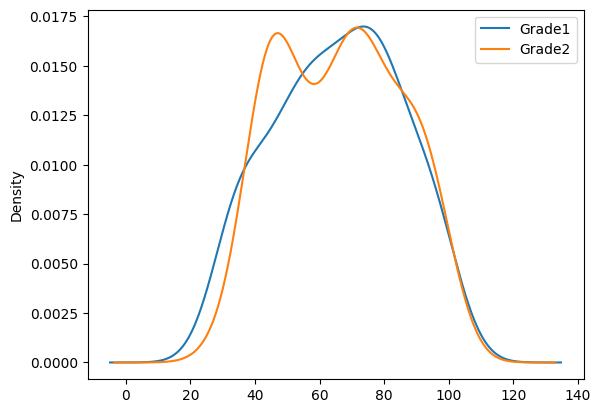

In [ ]:
X, Y = load_dataset('marks.csv')

In [ ]:
X_norm = np.apply_along_axis(normalize_data, 0, X)
#X_norm

#$\textbf{Main}$
---

$\textbf{Model Training}$

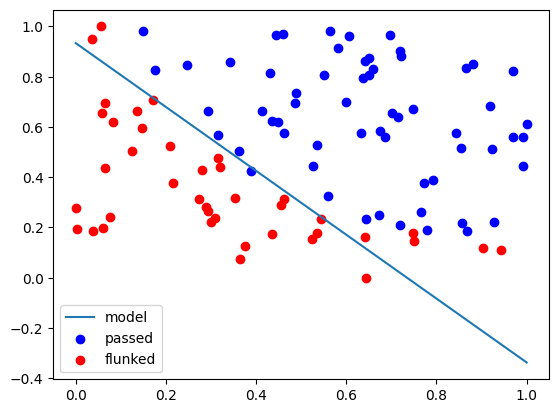

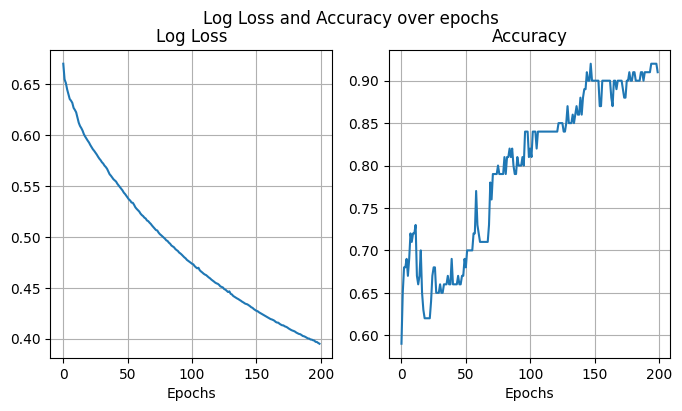

In [ ]:
# define a Logistic Regression instance
log_reg = Logistic_Regression(X_norm, Y)
# training process
log_reg.train(LR=0.1, epochs=200)
# plot model
log_reg.plot_model()
# plot error/accuracy history
log_reg.plot_loss_accuracy()

$\textbf{Model Evaluation}$

In [ ]:
log_reg.model.evaluate(X_norm, Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.9200


[0.3946094810962677, 0.9200000166893005]

$\textbf{Accuracy}$

In [ ]:
# get model predictions: array of shape (100, 1)
pred = log_reg.model.predict(X_norm, verbose=0)
pred = np.round(pred)
# reshape the array from 2 to 1 dimension (to compare it with 'Y' vector)
# "pred.reshape(100)" should also work (NOTE: -1 is used if you don't know the number of elements)
pred = pred.reshape(-1)
pred

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [ ]:
# compute accuracy
sum(pred == Y)/len(X_norm)



0.92

In [ ]:
pred = log_reg.model.predict(X_norm, verbose=0)
m = Metrics(X_norm, Y, np.round(pred.reshape(-1)))
print(m.confusion_matrix())

[[59  7]
 [ 1 33]]


In [ ]:
class Metrics:
     def __init__(self, X, Y, pred):
         self.N = len(X)
         # data classification
         self.TP = X[(pred==1) & (Y==1)]
         self.TN = X[(pred==0) & (Y==0)]
         self.FP = X[(pred==1) & (Y==0)]
         self.FN = X[(pred==0) & (Y==1)]
     def confusion_matrix(self):
         return np.array([[len(self.TP), len(self.FP)],[len(self.FN),len(self.TN)]])

     def accuracy(self):
         return (len(self.TP) + len(self.TN))/self.N

     def precision(self):
         return len(self.TP)/(len(self.TP)+len(self.FP))

     def recall(self):
         return len(self.TP)/(len(self.TP)+len(self.FN))

     def F_beta_score(self, beta):
         return (1+beta**2)*len(self.TP)/((1+beta**2)*len(self.TP)+len(self.FP)+beta**2*len(self.FN))

     def plot_predictions(self):
        fig, ax = plt.subplots()
        for color,  data, name in zip(["blue", "red", "yellow", "green"],[self.TP, self.TN, self.FP, self.FN],["TP","TN","FP","FN"]):
          ax.scatter(x = data[:,0], y= data[:,1], c = color, label  = str(name))
        plt.legend()
        plt.show()

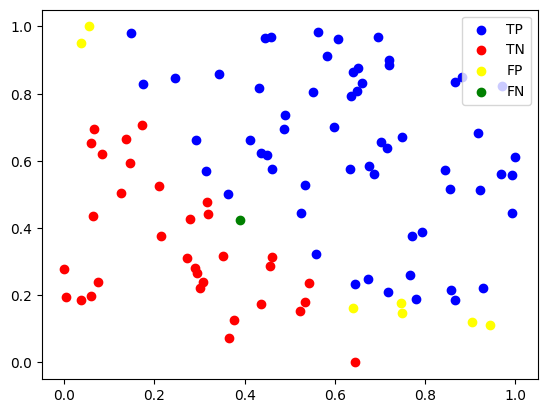

In [ ]:
m.plot_predictions()

#$\color{green}{\textbf{Exercise 5}}$
---

1. Create a $\color{blue}{\textbf{class}}$ to compute $\color{green}{\text{evaluation metrics}}$ for a given $\color{red}{\text{dataset}}$ ($\textit{features}$ and $\textit{labels}$) and a vector of $\color{blue}{\text{predictions}}$.
```
class Metrics:
        def __init__(self, X, Y, pred):
            self.N = len(X)
            # data classification
            self.TP = <list of all pairs in X classified as "True Positives">
            self.TN = <list of all pairs in X classified as "True Negatives">
            self.FP = <list of all pairs in X classified as "False Positives">
            self.FN = <list of all pairs in X classified as "False Negatives">
        
        def confusion_matrix(self):
            return <confusion matrix as an "np.array">

        def accuracy(self):
            return (len(self.TP) + len(self.TN))/self.N

        def precision(self):
            return <precision metric>

        def recall(self):
            return <recall metric>

        def F_beta_score(self, beta):
            return <F-Beta Score for a given 'beta'>

        def plot_predictions(self):
            # plot the data classification
```

2. Test your code
```
pred = log_reg.model.predict(X_norm, verbose=0)
m = Metrics(X_norm, Y, np.round(pred.reshape(-1)))
```
   Example of confusion matrix
```
print(m.confusion_matrix())
>> [[57  3]
       [ 6 34]]
```

   Example of accuracy
```
m.accuracy()
>> 0.91
```    

   Example of plot
```
m.plot_predictions()
```
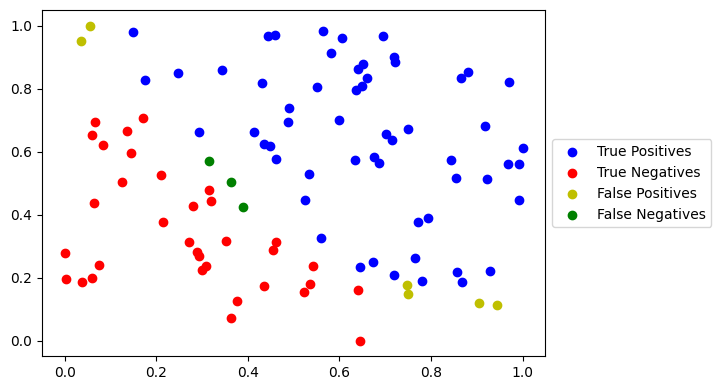
